## Curso de Big Data

## Trabajo Práctico 2 - Parte 1

### Grupo:  Armas Braithwaite, Fernández, Menta, Vargas Ochuza

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


## Enunciado
Entren a la página https://www.indec.gob.ar/ y vayan a la sección Servicios y Herramientas > Bases de datos. Descarguen la base de microdatos de la Encuesta Permanente de Hogares (EPH) correspondiente al primer trimestre de 2023 en formato xls (una vez descargada, la base a usar debería llamarse usu individual T123.xls). En la página web, también encontrará un diccionario de variables con el nombre de ”Diseño de registro y estructura para las bases preliminares (hogares y personas)”; este archivo les indica qué significa cada variable que aparece en la base de datos, en particular, en la sección de Diseño de registros de la base Personas.

In [1]:
# Importamos el módulo necesario para trabajar con la base de datos
import pandas as pd

In [2]:
# Seteamos el directorio donde vamos a trabajar
import os
os.chdir("C:/Users/mateo/Documents/UdeSA/Big_data/TP2")

In [3]:
# Importamos la base de datos
microdata = pd.read_excel("usu_individual_T123.xlsx ")

In [4]:
# Vemos un resumen completo del dataframe
microdata.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48638 entries, 0 to 48637
Data columns (total 177 columns):
 #    Column      Dtype  
---   ------      -----  
 0    CODUSU      object 
 1    ANO4        int64  
 2    TRIMESTRE   int64  
 3    NRO_HOGAR   int64  
 4    COMPONENTE  int64  
 5    H15         int64  
 6    REGION      int64  
 7    MAS_500     object 
 8    AGLOMERADO  int64  
 9    PONDERA     int64  
 10   CH03        int64  
 11   CH04        int64  
 12   CH05        object 
 13   CH06        int64  
 14   CH07        int64  
 15   CH08        float64
 16   CH09        int64  
 17   CH10        int64  
 18   CH11        int64  
 19   CH12        int64  
 20   CH13        int64  
 21   CH14        float64
 22   CH15        int64  
 23   CH15_COD    float64
 24   CH16        int64  
 25   CH16_COD    float64
 26   NIVEL_ED    int64  
 27   ESTADO      int64  
 28   CAT_OCUP    int64  
 29   CAT_INAC    int64  
 30   IMPUTA      float64
 31   PP02C1      int64  
 32   

In [5]:
# Analizamos la columna aglomerados antes de filtrar por ella
microdata['AGLOMERADO']

0        91
1        91
2        91
3        91
4        91
         ..
48633    10
48634    10
48635    10
48636    10
48637    10
Name: AGLOMERADO, Length: 48638, dtype: int64

#### Ejercicio a
Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

In [6]:
# Del diccionario de variables sabemos que tenemos que quedarnos solamente con los valores 32 y 33
# que son los correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

# Filtramos el dataframe y lo renombramos
microdata_filtered = microdata[(microdata['AGLOMERADO'] == 32) | (microdata['AGLOMERADO'] == 33)]

# Observamos que aparece filtrada la columna "Aglomerado"
microdata_filtered['AGLOMERADO']

102      33
103      33
104      33
105      33
106      33
         ..
48597    33
48598    33
48599    33
48600    33
48601    33
Name: AGLOMERADO, Length: 7619, dtype: int64

#### Inciso b
Si hay observaciones con valores que no tienen sentido, descártenlas (ingresos y edades negativos, por ejemplo).


In [7]:
columnas_de_interes = ['CH04','CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']  

for col in columnas_de_interes:
    print(f"Valores únicos para {col}:")
    print(microdata[col].unique())

Valores únicos para CH04:
[1 2]
Valores únicos para CH08:
[ 1.  4.  3.  2. 12.  9. 13. 23. nan]
Valores únicos para NIVEL_ED:
[1 4 3 5 2 6 7]
Valores únicos para ESTADO:
[4 3 1 2 0]
Valores únicos para CAT_INAC:
[3 1 0 4 5 7 2 6]
Valores únicos para IPCF:
[ 79700. 180000. 145000. ...  31550.  23825. 262000.]


In [8]:
cuenta = microdata_filtered['ESTADO'].value_counts()
print(cuenta)

1    3523
3    2837
4     949
2     286
0      24
Name: ESTADO, dtype: int64


In [9]:
# Condiciones de filtrado
## Ingresos per cápita = 0
## Cat_INAC = 0, este es el caso en el que no les corresponde la variable, si no lo filtramos vamos a tener mucho ruido.

microdata_filtered = microdata_filtered[(microdata_filtered["IPCF"]>=0) & (microdata_filtered["CH06"]>0) & (microdata_filtered["CH08"]!="nan")]

In [10]:
## PREGUNTAR: FILTRAMOS POR TODAS LAS COLUMNAS QUE TENGAN VALORES RAROS O SOLO EN LAS QUE NOS INTERESAN???

#### Inciso c 
Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo.

In [11]:
import matplotlib.pyplot as plt

In [12]:
porcentaje_sexo = (microdata_filtered['CH04'].value_counts(normalize=True) * 100)

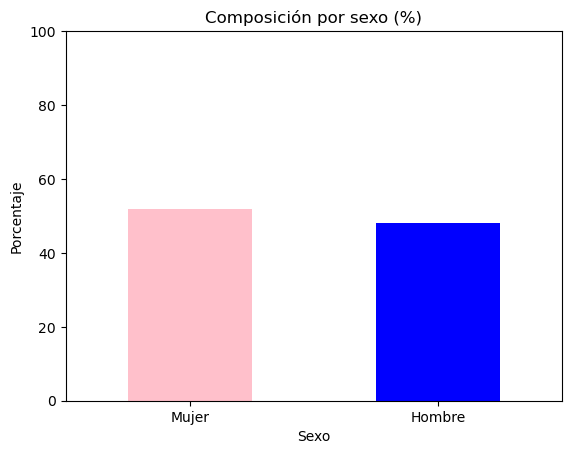

In [13]:
colores = {'1': 'blue', '2': 'pink'}
etiquetas = {1: 'Hombre', 2: 'Mujer'}

porcentaje_sexo.plot(kind='bar', color=[colores[key] for key in porcentaje_sexo.index.map(str)])
plt.title('Composición por sexo (%)')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje')
plt.xticks(ticks=range(len(etiquetas)), labels=[etiquetas[key] for key in porcentaje_sexo.index], rotation=0)
plt.ylim(0, 100)  # Esto establece los límites del eje y de 0% a 100%
plt.show()


#### Ejercicio d
Realicen una matriz de correlación con las siguientes variables: CH04, CH07, CH08, NIVEL ED, ESTADO, CAT INAC, IPCF. Comenten los resultados.

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [15]:
!pip install heatmapz

In [16]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

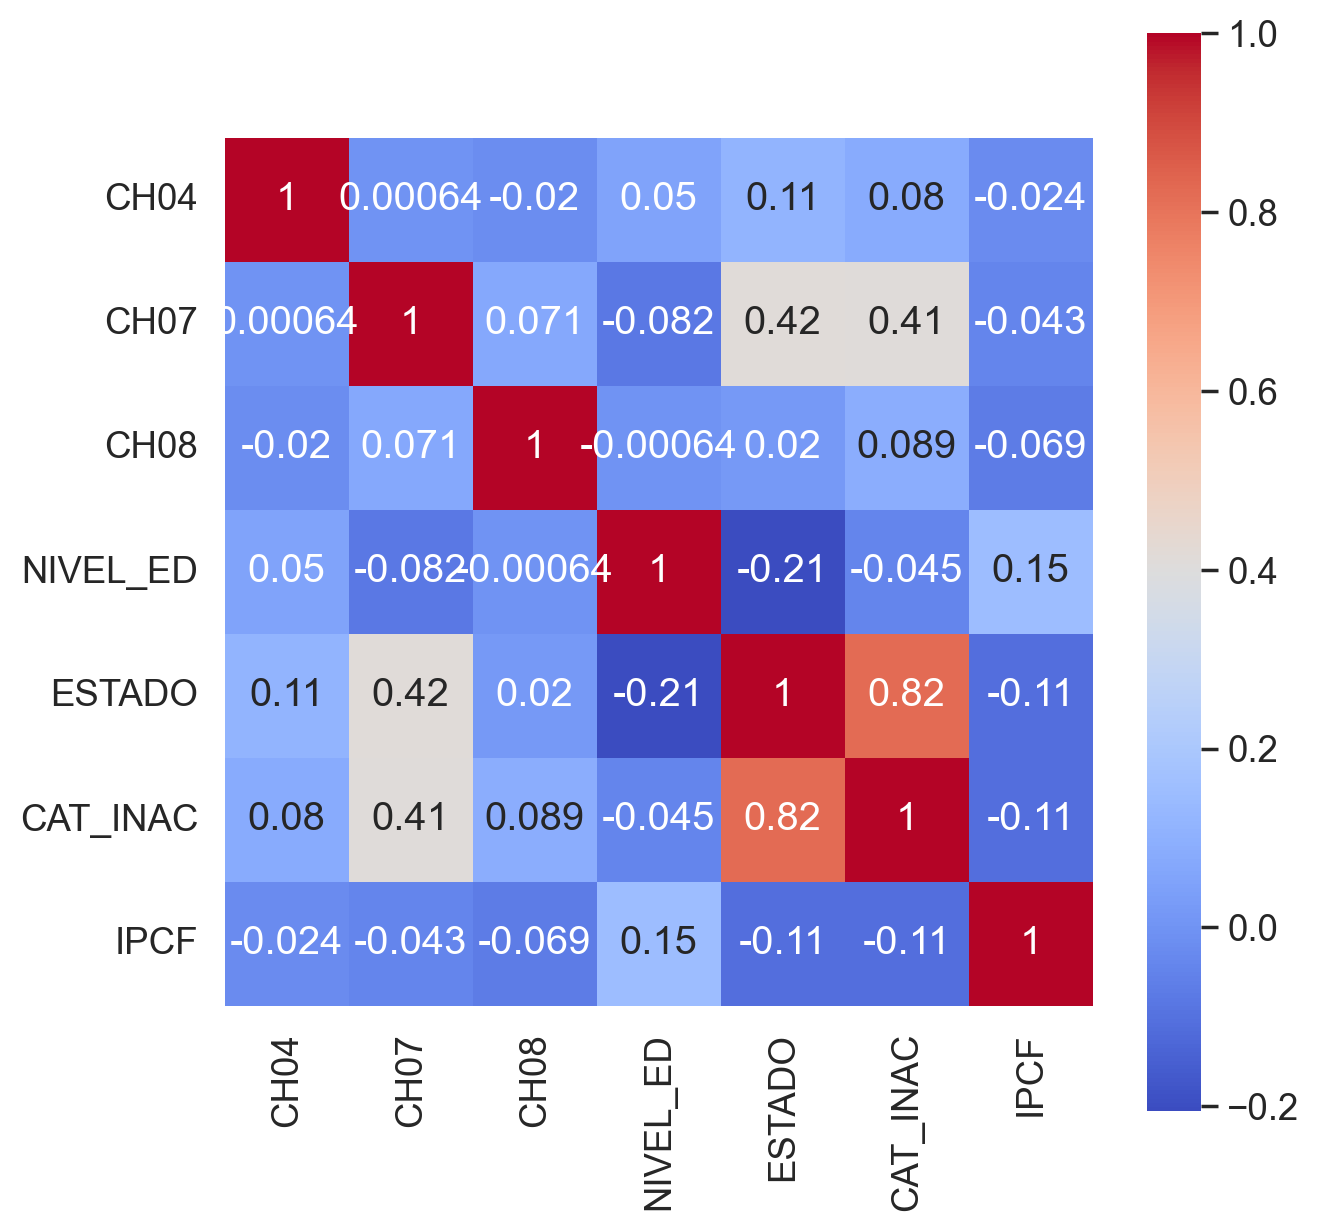

In [17]:
# Selecciona las columnas de interés
cols_of_interest = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
subset_data = microdata_filtered[cols_of_interest]

# Calcula la matriz de correlación
corr_matrix = subset_data.corr()

# Genera el heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

#### Inciso e
¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [18]:
# Obteniendo el conteo de valores para la columna 'ESTADO'
counts = microdata_filtered['ESTADO'].value_counts()

# Obteniendo el conteo específico para los valores 2 y 3
desocupados_count = counts.get(2, 0)  # El '0' es un valor por defecto en caso de que no haya ningún '2'
inactivos_count = counts.get(3, 0)  # El '0' es un valor por defecto en caso de que no haya ningún '3'

# Printeando el resultado
print(f"Hay {desocupados_count} desocupados y {inactivos_count} inactivos.")


Hay 286 desocupados y 2837 inactivos.


In [19]:
# Agrupando por 'ESTADO' y obteniendo la media de 'IPCF'
means = microdata_filtered.groupby('ESTADO')['IPCF'].mean()

# Creando un DataFrame para presentar los resultados de manera tabulada
result = pd.DataFrame({
    'ESTADO': ['Ocupado', 'Desocupado', 'Inactivo'],
    'Media IPCF': [means.get(1, np.nan), means.get(2, np.nan), means.get(3, np.nan)]  # Usando np.nan como valor por defecto en caso de que no haya algún estado
})

print(result)

       ESTADO    Media IPCF
0     Ocupado  59579.442915
1  Desocupado  25536.022203
2    Inactivo  40067.996052


#### Inciso f 


In [20]:
microdata2 = pd.read_excel("tabla_adulto_equiv.xlsx ")

In [21]:
microdata2

,Edad,Mujeres,Varones
0,Menor de 1 año,0.35,0.35
1,1año,0.37,0.37
2,2 años,0.46,0.46
3,3 años,0.51,0.51
4,4 años,0.55,0.55
5,5 años,0.60,0.60
6,6 años,0.64,0.64
7,7 años,0.66,0.66
8,8 años,0.68,0.68
9,9 años,0.69,0.69


In [ ]:
microdata2_new = pd.DataFrame(columns=['Edad', 'Mujeres', 'Varones'])

for index, row in microdata2.iterrows():
    if 'Menor de 1 año' in row['Edad']:
        age_range = [0, 0]
    elif 'más de 75 años' in row['Edad']:
        age_range = [76, 150]  # Suponiendo un valor máximo razonable para la edad
    elif 'año' in row['Edad'] and ' a ' not in row['Edad']:
        age_val = row['Edad'].split(' ')[0].replace('año', '').strip()  # Limpiar la cadena
        age_range = [int(age_val), int(age_val)]
    else:
        # Limpieza adicional para quitar ' años' de cada número
        age_range = [int(i.replace('años', '').strip()) for i in row['Edad'].split(' a ')]
    
    for age in range(age_range[0], age_range[1] + 1):
        microdata2_new = microdata2_new.append({'Edad': age, 'Mujeres': row['Mujeres'], 'Varones': row['Varones']}, ignore_index=True)

In [ ]:
print(microdata2_new)

In [ ]:
# Creamos dos columnas auxiliares para el matching basado en el sexo
microdata2_new['Varones_match'] = 1
microdata2_new['Mujeres_match'] = 2

# Realizamos el merge
merged_df = pd.merge(microdata_filtered, microdata2_new, 
                     left_on=['CH06', 'CH04'], 
                     right_on=['Edad', 'Varones_match'], 
                     how='left')

# Para aquellos que no coincidieron con 'Varones', intentamos con 'Mujeres'
merged_df2 = pd.merge(microdata_filtered, microdata2_new, 
                     left_on=['CH06', 'CH04'], 
                     right_on=['Edad', 'Mujeres_match'], 
                     how='left')

# Creamos la columna 'adulto_equiv' basada en las coincidencias
merged_df['adulto_equiv'] = merged_df['Varones'].fillna(merged_df2['Mujeres'])

# Eliminamos las columnas auxiliares y las columnas extra de 'Varones' y 'Mujeres'
merged_df.drop(columns=['Varones_match', 'Mujeres_match', 'Varones', 'Mujeres', 'Edad'], inplace=True)

# Reemplaza tu dataframe original con el dataframe fusionado
microdata_filtered = merged_df

In [ ]:
microdata_filtered['adulto_equiv']

In [ ]:
# Seguimos con el mismo df ya definido
microdata_filtered_agg = microdata_filtered.groupby(by=["CODUSU"]).agg({"adulto_equiv":"sum"})

microdata_filtered_agg.rename(columns={'adulto_equiv': 'ad_equiv'}, inplace=True)

microdata_filtered_agg.reset_index(inplace=True)
# Si observan el resultado verán que las variables de agrupamiento pasan a definir el índice
microdata_filtered_agg

In [ ]:
# Realizamos el left join
merged_df = pd.merge(microdata_filtered, microdata_filtered_agg[['CODUSU', 'ad_equiv']], 
                     on='CODUSU', 
                     how='left')

# Renombramos la columna 'adulto_equiv' a 'ad_equiv_hogar'
merged_df.rename(columns={'ad_equiv': 'ad_equiv_hogar'}, inplace=True)

# Reemplaza tu dataframe original con el dataframe fusionado
microdata_filtered = merged_df

In [ ]:
microdata_filtered['ad_equiv_hogar']

#### Ejercicio 3
Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su ingreso total familiar (ITF)? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su ITF. Las observaciones con ITF = 0 guárdenlas en una base bajo el nombre norespondieron.

In [ ]:
respondieron = microdata_filtered[(microdata_filtered['ITF'] > 0)]
norespondieron = microdata_filtered[(microdata_filtered['ITF'] == 0)]

print(len(respondieron))
print(len(norespondieron))

#### Ejercicio 4
Sabiendo que la Canasta Básica Total para un adulto equivalente en el Gran Buenos Aires en el primer trimestre de 2023 es aproximadamente $57.371,05, agreguen a la base respondieron una columna llamada ingreso_necesario que sea el producto de este valor por ad_equiv_hogar. Note que este es el valor mínimo que necesita ese hogar para no ser pobre.

In [ ]:
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05

#### Ejercicio 9
Por último, agreguen a respondieron una columna llamada pobre que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario. ¿Cuántos pobres identificaron?

In [ ]:
respondieron['pobre'] = np.where(respondieron['ITF'] < respondieron['ingreso_necesario'], 1, 0)

In [ ]:
respondieron.to_excel("respondieron.xlsx")